# 01 SIMBA multimodal replicate

In [1]:
%load_ext autoreload
%autoreload 2

In [46]:
import os
import simba as si
workdir = '../results/01'
si.settings.set_workdir(workdir)

import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from refs import celltype_colors

si.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})
# to make plots prettier
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


Saving results in: ../results/01


/var/folders/h3/49kgmgs54yv7pd7wbst2wfv80000gp/T/ipykernel_37368/64324059.py:21: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


# Data

In [7]:
adata_CG_fn = '../results/00/rna_annot.h5ad'
adata_CP_fn = '../results/00/atac_annot.h5ad'

adata_CG = sc.read_h5ad(adata_CG_fn)
adata_CP = sc.read_h5ad(adata_CP_fn)


# RNA discretize

In [8]:
si.tl.discretize(adata_CG,n_bins=5)

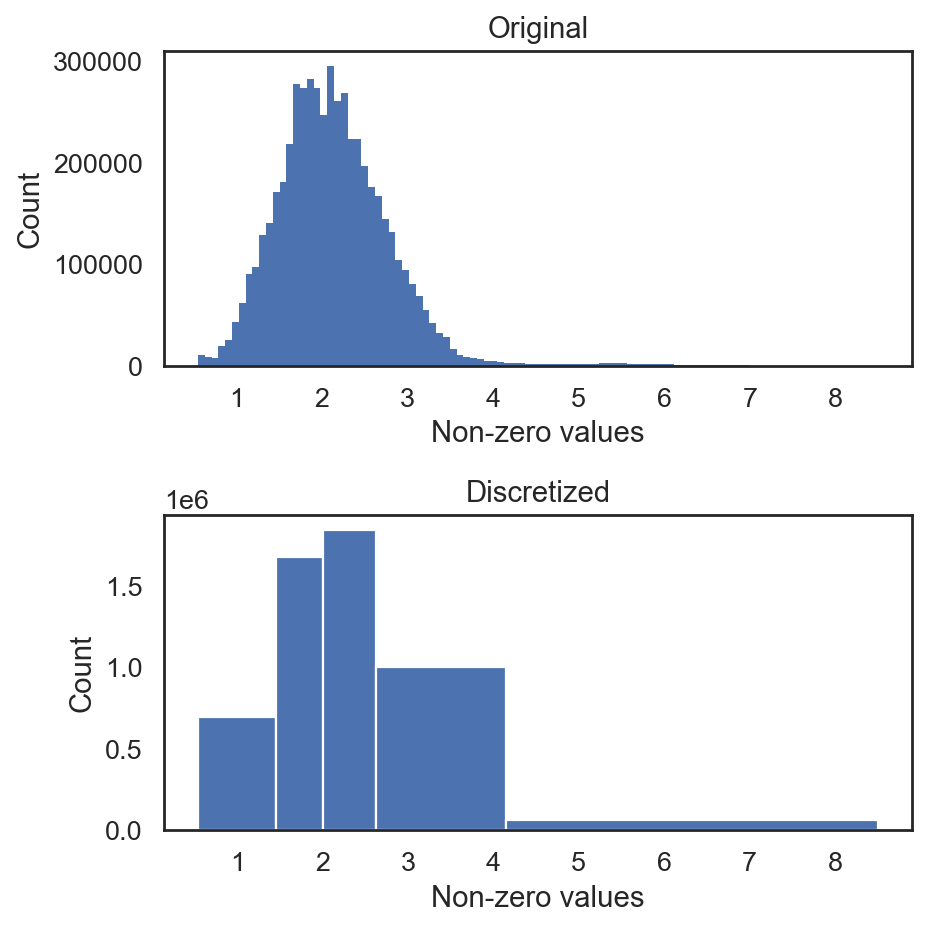

In [9]:
si.pl.discretize(adata_CG,kde=False)

# Generate graph and train

## RNA only

In [18]:
si.tl.gen_graph(list_CP=[adata_CG],
                copy=False,
                use_highly_variable=False,
                use_top_pcs=False,
                dirname='graph_CG')


relation0: source: C, destination: P
#edges: 5281442
Total number of edges: 5281442
Writing graph file "pbg_graph.txt" to "../results/01/pbg/graph_CG" ...
Finished.


In [19]:
si.tl.pbg_train(auto_wd=True, save_wd=True, output='model')

Auto-estimating weight decay ...
`.settings.pbg_params['wd']` has been updated to 0.006709
Weight decay being used for training is 0.006709
Converting input data ...
[2025-05-03 17:26:00.444018] Using the 1 relation types given in the config
[2025-05-03 17:26:00.445253] Searching for the entities in the edge files...
[2025-05-03 17:26:07.760196] Entity type C:
[2025-05-03 17:26:07.760790] - Found 6436 entities
[2025-05-03 17:26:07.761262] - Removing the ones with fewer than 1 occurrences...
[2025-05-03 17:26:07.763530] - Left with 6436 entities
[2025-05-03 17:26:07.763973] - Shuffling them...
[2025-05-03 17:26:07.767170] Entity type G:
[2025-05-03 17:26:07.767694] - Found 0 entities
[2025-05-03 17:26:07.768033] - Removing the ones with fewer than 1 occurrences...
[2025-05-03 17:26:07.768319] - Left with 0 entities
[2025-05-03 17:26:07.768593] - Shuffling them...
[2025-05-03 17:26:07.769170] Entity type P:
[2025-05-03 17:26:07.769479] - Found 17399 entities
[2025-05-03 17:26:07.769798] 

/Users/cchu/Desktop/phd_work/hyperChromatin/src/simba_pbg/torchbiggraph/tensorlist.py:86: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  if data.numel() == 0 and data.storage().size() == 0:
/Users/cchu/Desktop/phd_work/hyperChromatin/src/simba_pbg/torchbiggraph/tensorlist.py:86: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  if data.numel() == 0 and data.storage().size() == 0:
/Users/cchu/Desktop/phd_work/hyperChromatin/src/simba_pbg/torchbiggraph/tensorlist.py:86: UserWarning: TypedStorage is deprecated. It will b

Finished


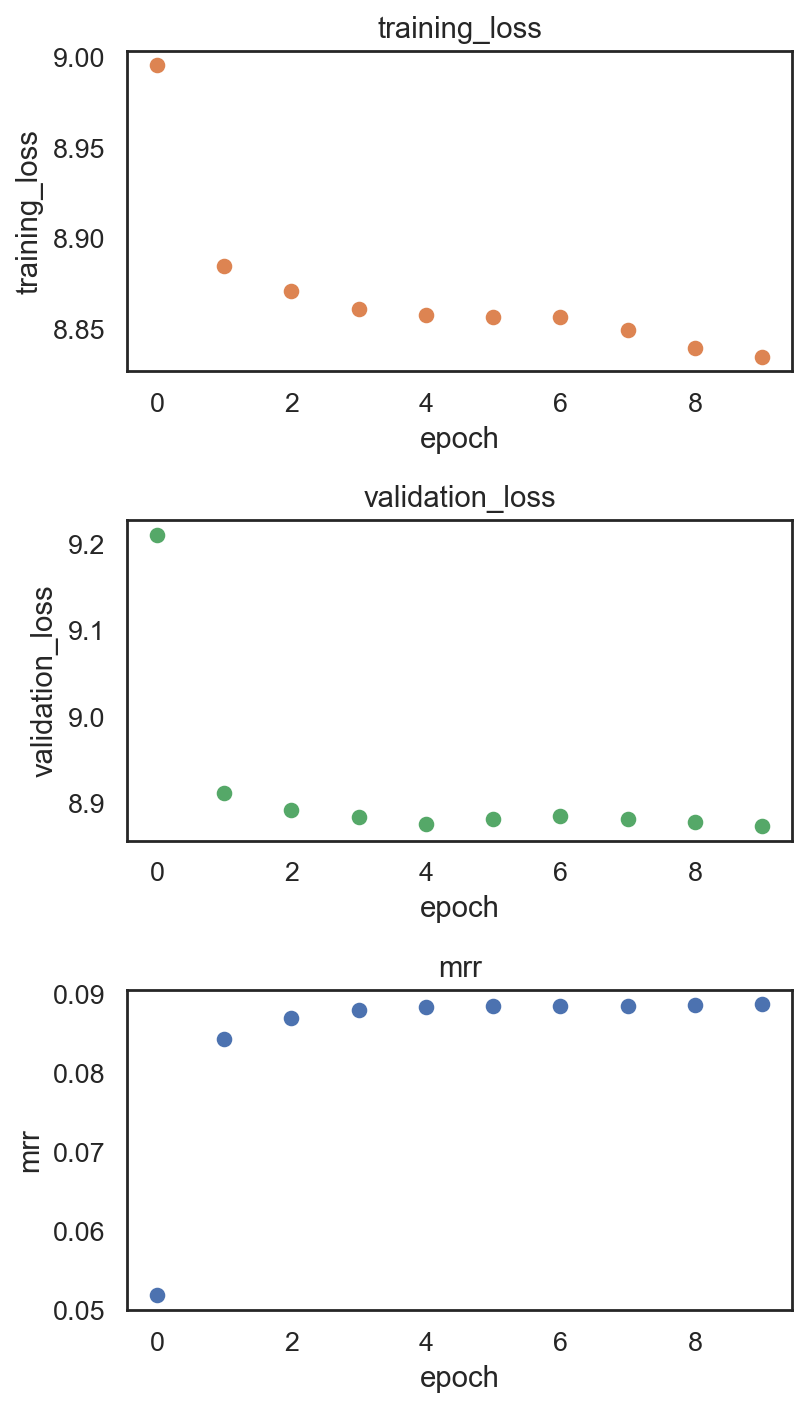

In [20]:
si.pl.pbg_metrics(fig_ncol=1)

In [51]:
# load in graph ('graph0') info
si.load_graph_stats(path=f'{workdir}/pbg/graph_CG/')
# load in model info for ('graph0')
si.load_pbg_config(path=f'{workdir}/pbg/graph_CG/model/')

In [52]:
CG_dict_adata = si.read_embedding()
CG_adata_C = CG_dict_adata['C']
CG_adata_C.obs['celltype'] = adata_CG[CG_adata_C.obs_names,:].obs['celltype'].copy()
si.tl.umap(CG_adata_C,n_neighbors=15,n_components=2)

/Users/cchu/Desktop/phd_work/hyperChromatin/env/hyperChrom_pyenv/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


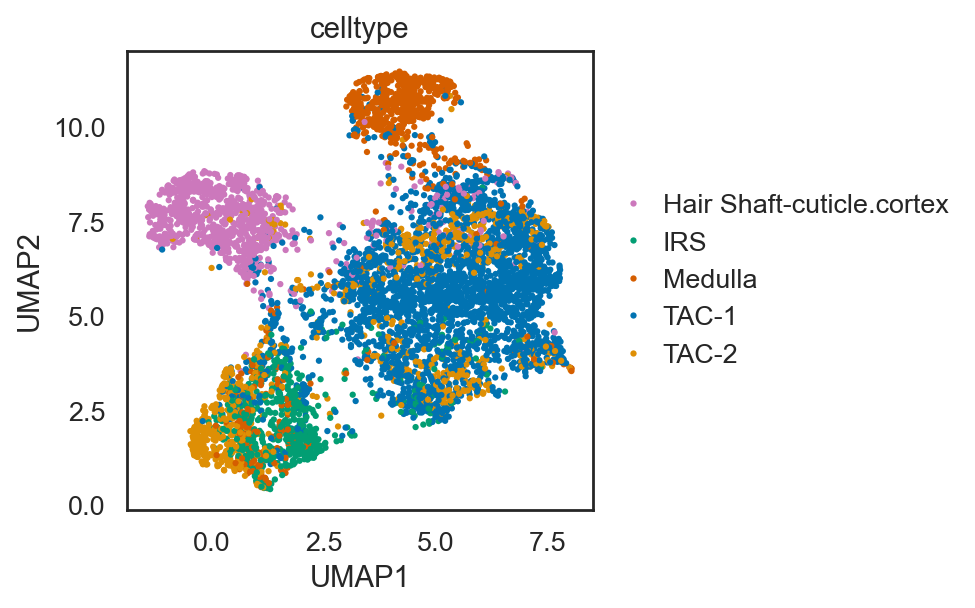

In [53]:
si.pl.umap(CG_adata_C,
           color=['celltype'],dict_palette={'celltype': celltype_colors},
           fig_size=(6,4),
           drawing_order='random')

In [54]:
CG_adata_C.uns

OrderedDict([('color',
              {'celltype_color': {'TAC-1': '#0173b2',
                'TAC-2': '#de8f05',
                'IRS': '#029e73',
                'Medulla': '#d55e00',
                'Hair Shaft-cuticle.cortex': '#cc78bc'}})])

In [55]:
CG_adata_C_fn = f'{workdir}/simba_CG_adata_C.h5ad'
print(CG_adata_C_fn)
CG_adata_C.write(CG_adata_C_fn)

../results/01/simba_CG_adata_C.h5ad


## ATAC only

In [24]:
si.tl.gen_graph(list_CP=[adata_CP],
                copy=False,
                use_highly_variable=False,
                use_top_pcs=False,
                dirname='graph_CP')


`simba` does not exist in anndata 0 in `list_CP`.`.X` is being used instead.
relation0: source: C, destination: P
#edges: 29715636
Total number of edges: 29715636
Writing graph file "pbg_graph.txt" to "../results/01/pbg/graph_CP" ...
Finished.


In [25]:
si.tl.pbg_train(auto_wd=True, save_wd=True, output='model')

Auto-estimating weight decay ...
`.settings.pbg_params['wd']` has been updated to 0.001192
Weight decay being used for training is 0.001192
Converting input data ...
[2025-05-03 17:56:31.135119] Using the 1 relation types given in the config
[2025-05-03 17:56:31.135779] Searching for the entities in the edge files...
[2025-05-03 17:57:17.826435] Entity type C:
[2025-05-03 17:57:17.827007] - Found 6436 entities
[2025-05-03 17:57:17.827463] - Removing the ones with fewer than 1 occurrences...
[2025-05-03 17:57:17.829431] - Left with 6436 entities
[2025-05-03 17:57:17.830087] - Shuffling them...
[2025-05-03 17:57:17.834154] Entity type G:
[2025-05-03 17:57:17.834761] - Found 0 entities
[2025-05-03 17:57:17.835183] - Removing the ones with fewer than 1 occurrences...
[2025-05-03 17:57:17.835567] - Left with 0 entities
[2025-05-03 17:57:17.836145] - Shuffling them...
[2025-05-03 17:57:17.836526] Entity type P:
[2025-05-03 17:57:17.836881] - Found 332987 entities
[2025-05-03 17:57:17.837465]

/Users/cchu/Desktop/phd_work/hyperChromatin/src/simba_pbg/torchbiggraph/tensorlist.py:86: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  if data.numel() == 0 and data.storage().size() == 0:
/Users/cchu/Desktop/phd_work/hyperChromatin/src/simba_pbg/torchbiggraph/tensorlist.py:86: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  if data.numel() == 0 and data.storage().size() == 0:
/Users/cchu/Desktop/phd_work/hyperChromatin/src/simba_pbg/torchbiggraph/tensorlist.py:86: UserWarning: TypedStorage is deprecated. It will b

Finished


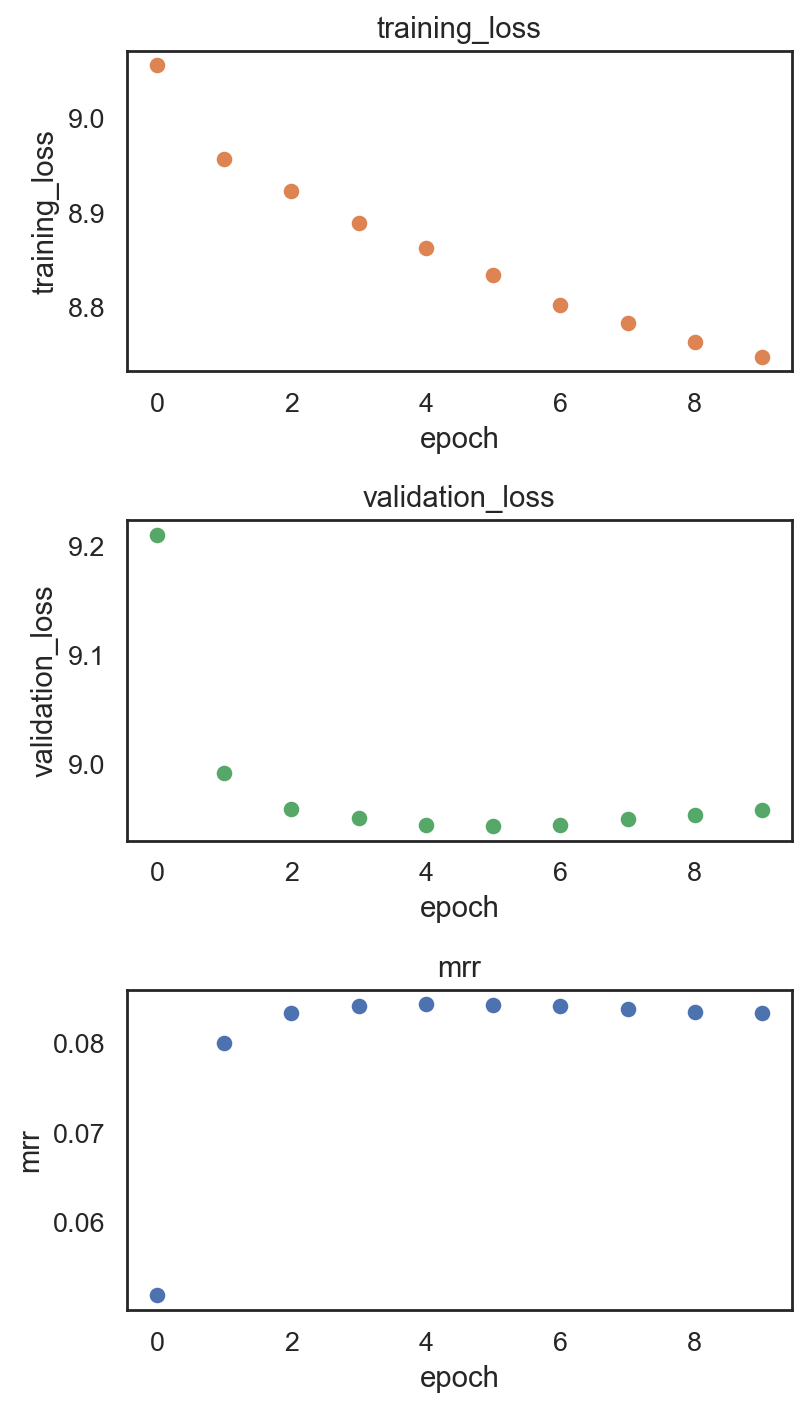

In [26]:
si.pl.pbg_metrics(fig_ncol=1)

In [56]:
# load in graph ('graph0') info
si.load_graph_stats(path=f'{workdir}/pbg/graph_CP/')
# load in model info for ('graph0')
si.load_pbg_config(path=f'{workdir}/pbg/graph_CP/model/')

In [57]:
CP_dict_adata = si.read_embedding()
CP_adata_C = CP_dict_adata['C']
CP_adata_C.obs['celltype'] = adata_CP[CP_adata_C.obs_names,:].obs['celltype'].copy()
si.tl.umap(CP_adata_C,n_neighbors=15,n_components=2)

/Users/cchu/Desktop/phd_work/hyperChromatin/env/hyperChrom_pyenv/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


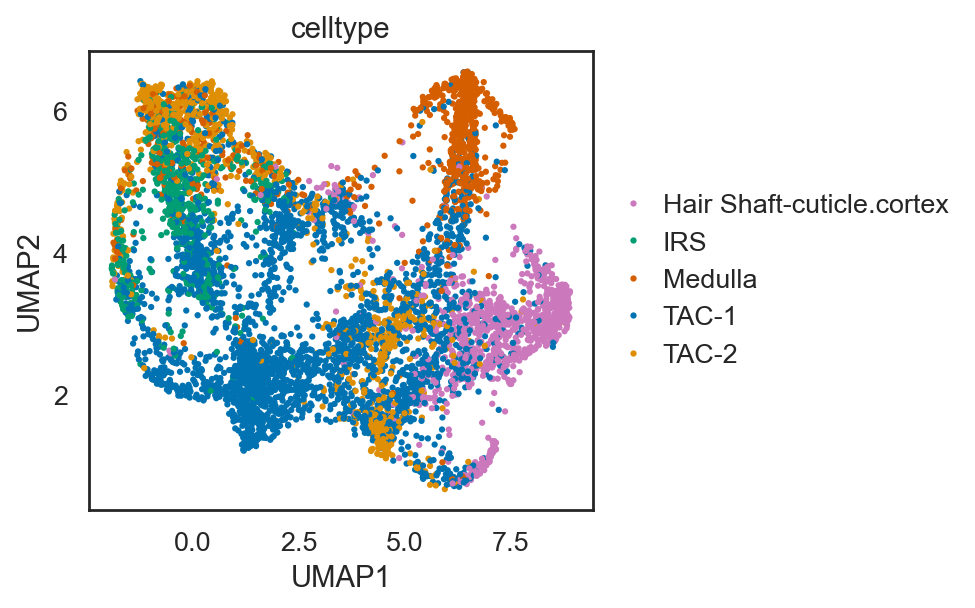

In [58]:
si.pl.umap(CP_adata_C,
           color=['celltype'],dict_palette={'celltype': celltype_colors},
           fig_size=(6,4),
           drawing_order='random')

In [60]:
CP_adata_C_fn = f'{workdir}/simba_CP_adata_C.h5ad'
print(CP_adata_C_fn)
CP_adata_C.write(CP_adata_C_fn)

../results/01/simba_CP_adata_C.h5ad


# RNA and ATAC

In [11]:
si.tl.gen_graph(list_CP=[adata_CP],
                list_CG=[adata_CG],
                copy=False,
                use_highly_variable=False,
                use_top_pcs=False,
                dirname='graph_CG_CP')


`simba` does not exist in anndata 0 in `list_CP`.`.X` is being used instead.
relation0: source: C, destination: P
#edges: 29715636
relation1: source: C, destination: G
#edges: 694558
relation2: source: C, destination: G
#edges: 1679737
relation3: source: C, destination: G
#edges: 1843554
relation4: source: C, destination: G
#edges: 999689
relation5: source: C, destination: G
#edges: 63904
Total number of edges: 34997078
Writing graph file "pbg_graph.txt" to "../results/01/pbg/graph_CG_CP" ...
Finished.


Default training parameters

In [12]:
si.tl.pbg_train(auto_wd=True, save_wd=True, output='model')

Auto-estimating weight decay ...
`.settings.pbg_params['wd']` has been updated to 0.001013
Weight decay being used for training is 0.001013
Converting input data ...
[2025-05-03 16:44:45.234822] Using the 6 relation types given in the config
[2025-05-03 16:44:45.235544] Searching for the entities in the edge files...
[2025-05-03 16:45:40.307417] Entity type C:
[2025-05-03 16:45:40.307908] - Found 6436 entities
[2025-05-03 16:45:40.308278] - Removing the ones with fewer than 1 occurrences...
[2025-05-03 16:45:40.310011] - Left with 6436 entities
[2025-05-03 16:45:40.311008] - Shuffling them...
[2025-05-03 16:45:40.315175] Entity type G:
[2025-05-03 16:45:40.315840] - Found 17399 entities
[2025-05-03 16:45:40.316184] - Removing the ones with fewer than 1 occurrences...
[2025-05-03 16:45:40.319019] - Left with 17399 entities
[2025-05-03 16:45:40.319888] - Shuffling them...
[2025-05-03 16:45:40.333084] Entity type P:
[2025-05-03 16:45:40.333781] - Found 332987 entities
[2025-05-03 16:45:40

/Users/cchu/Desktop/phd_work/hyperChromatin/src/simba_pbg/torchbiggraph/tensorlist.py:86: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  if data.numel() == 0 and data.storage().size() == 0:


[2025-05-03 16:49:38.360916] - Processed 34997078 edges in total
Starting training ...


/Users/cchu/Desktop/phd_work/hyperChromatin/src/simba_pbg/torchbiggraph/tensorlist.py:86: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  if data.numel() == 0 and data.storage().size() == 0:
/Users/cchu/Desktop/phd_work/hyperChromatin/src/simba_pbg/torchbiggraph/tensorlist.py:86: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  if data.numel() == 0 and data.storage().size() == 0:
/Users/cchu/Desktop/phd_work/hyperChromatin/src/simba_pbg/torchbiggraph/tensorlist.py:86: UserWarning: TypedStorage is deprecated. It will b

Finished


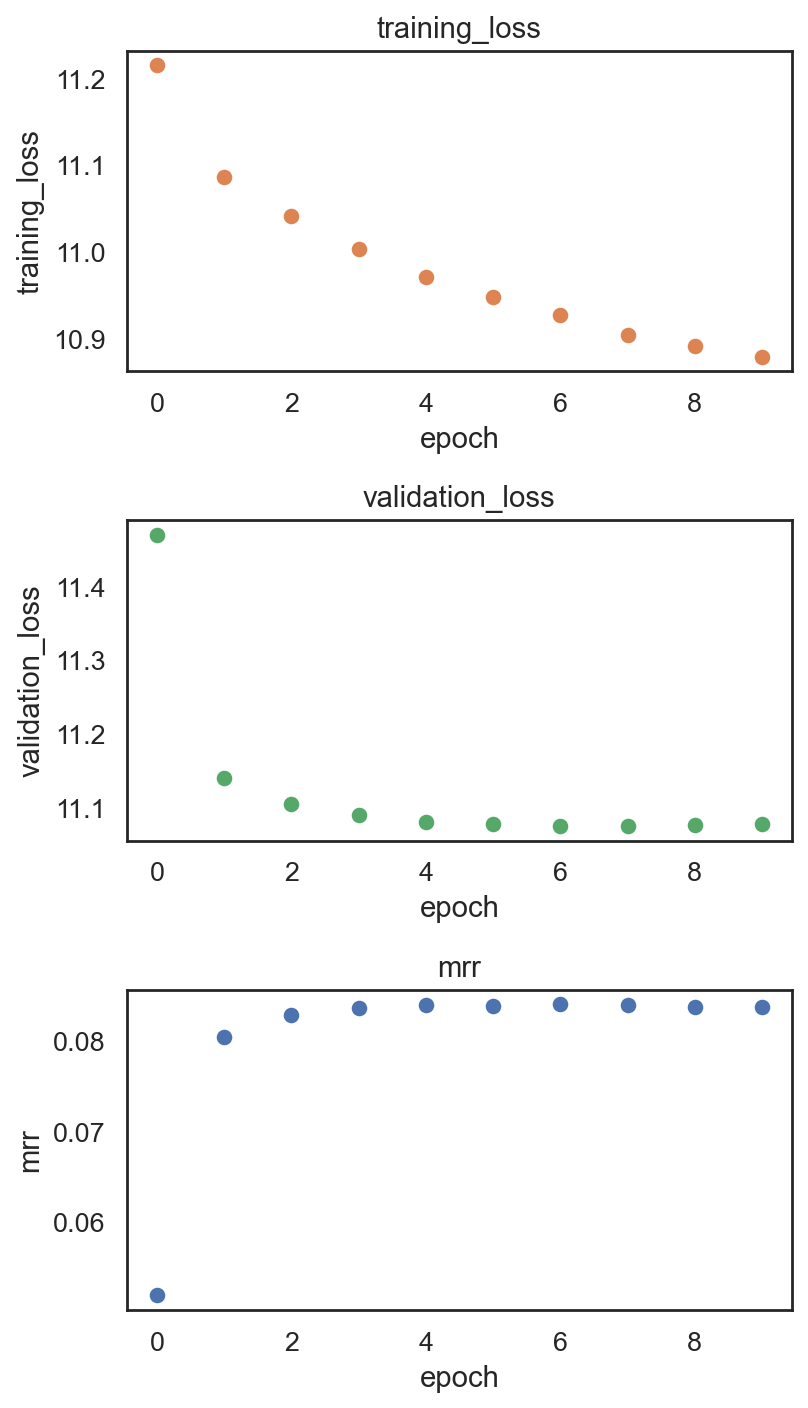

In [13]:
si.pl.pbg_metrics(fig_ncol=1)

In [61]:
# load in graph ('graph0') info
si.load_graph_stats(path=f'{workdir}/pbg/graph_CG_CP/')
# load in model info for ('graph0')
si.load_pbg_config(path=f'{workdir}/pbg/graph_CG_CP/model/')

In [62]:
CG_CP_dict_adata = si.read_embedding()
adata_C = CG_CP_dict_adata['C']
adata_C.obs['celltype'] = adata_CG[adata_C.obs_names,:].obs['celltype'].copy()
si.tl.umap(adata_C,n_neighbors=15,n_components=2)

/Users/cchu/Desktop/phd_work/hyperChromatin/env/hyperChrom_pyenv/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


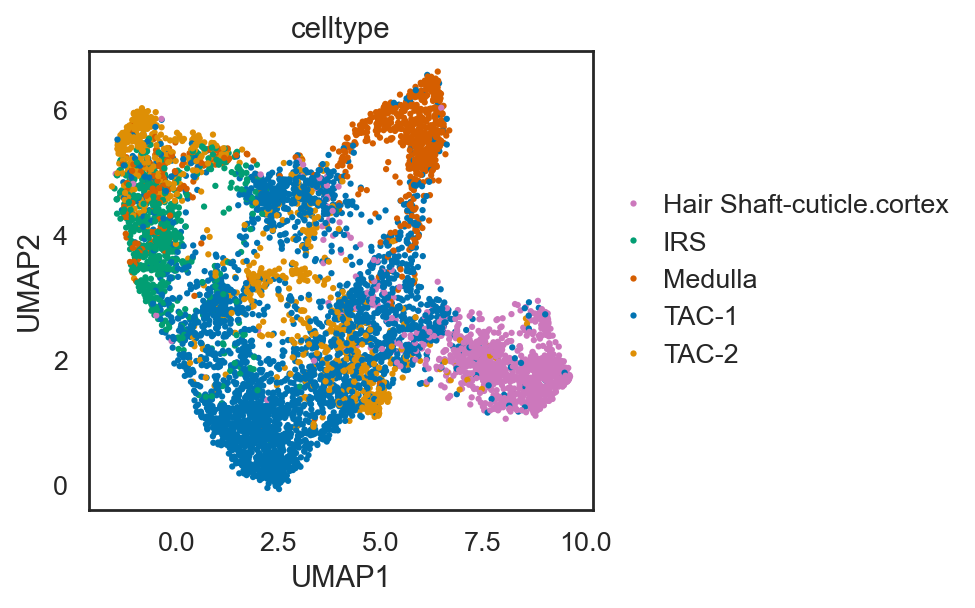

In [63]:
si.pl.umap(adata_C,
           color=['celltype'],dict_palette={'celltype': celltype_colors},
           fig_size=(6,4),
           drawing_order='random')

In [64]:
CG_CP_adata_C_fn = f'{workdir}/simba_CG_CP_adata_C.h5ad'
print(CG_CP_adata_C_fn)
adata_C.write(CG_CP_adata_C_fn)

../results/01/simba_CG_CP_adata_C.h5ad
